# MRI Classification


In [1]:
## Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models,datasets,layers
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import imutils
import os
from os import listdir
import SimpleITK
from imutils import paths
    ##image = cv.imread(directory + "\ " + filename)
import cv2 as cv

%matplotlib inline

## Preprocessing

In [2]:
## function to crop the image to only the important areas
def crop_brain_contour(org_img):
    #converting to gray scale
    ##un-comment this the see the RGB and Gray scale image
    ## plt.subplot(1,2,1)
    ##plt.inshow(org_img)
    gray = cv.cvtColor(org_img,cv.COLOR_BGR2GRAY)
    
    ##Smoothing the imgage 
    ##bilateral filtering
    blur1 = cv.bilateralFilter(gray,9,75,75)
    #gaussian filter
    blur2 = cv.GaussianBlur(gray,(5,5),0)
    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv.threshold(blur1, 45, 255, cv.THRESH_BINARY)[1]
    thresh = cv.erode(thresh, None, iterations=2)
    thresh = cv.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv.contourArea)
    
    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = org_img[extTop[1]:extBot[1], extLeft[0]:extRight[0]]        
    return new_image
## here we have a CROPPED image with only the important part of the scane
## we have used bi_lateral and gaussian filters on the image as well

In [3]:
X=[]     ## Images    
Y=[]     ## Labels 
images_yes = list(paths.list_images('/Users/apple/Desktop/Image processing/archive/yes'))
for i in images_yes:
    # load the image
        image = cv.imread(i)
        # crop the brain and ignore the unnecessary rest part of the image
        #####image = crop_brain_contour(image)
        # resize image
        image = cv.resize(image, dsize=(240, 240), interpolation=cv.INTER_CUBIC)
        # normalize values
        image = image / 255.
        # convert image to numpy array and append it to X
        X.append(image)
        Y.append(1)
        ########## We have here X --> images of tumour vala brain Y--> all 1's
images_no = list(paths.list_images('/Users/apple/Desktop/Image processing/archive/no'))
for i in images_no:
    # load the image
        image = cv.imread(i)
        # crop the brain and ignore the unnecessary rest part of the image
        image = crop_brain_contour(image)
        # resize image
        image = cv.resize(image, dsize=(240, 240), interpolation=cv.INTER_CUBIC)
        # normalize values
        image = image / 255.
        # convert image to numpy array and append it to X
        X.append(image)
        Y.append(0)
X = np.array(X)
Y = np.array(Y)
    
    # Shuffle the data
X, Y = shuffle(X, Y)    

## printing an image


### Croppping and Filtering 

In [4]:
## using the below crop_brain_contour###
#for image in X:
 #   image = crop_brain_contour(image)
X[1].shape   

(240, 240, 3)

In [5]:
## Data loading
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
## Data normalising
X_train,X_test = X_train/255,X_test/255
print(X_train.shape)
print(Y_train.shape)

(169, 240, 240, 3)
(169,)


###  Neural Network

In [6]:
## Neural Network 
model = models.Sequential()
## 1st Layer is convolutional layer with relu activation function
model.add(layers.Conv2D(32,(3,3),activation ='relu',input_shape=(240,240,3)))
## 2nd Layer is Maxpooling layer for the convolutional layer
model.add(layers.MaxPooling2D((2,2)))
## 3rd and 4th layer are same as above. 4th layer has 32 units
model.add(layers.Conv2D(64,(3,3),activation = 'relu' ))
model.add(layers.MaxPooling2D((2,2)))
## 5th layer is another convolutional layer with 32 units
model.add(layers.Conv2D(64,(3,3),activation = 'relu' ))
##6th layer is Flattening layee
model.add(layers.Flatten())
##7th layer is a dense layer with 64 units with relu activation function
model.add(layers.Dense(units= 64,activation='relu'))
##7th layer is a dense layer with 64 units with relu activation function
model.add(layers.Dense(units= 32,activation='relu'))
## 8th and the final layer is another dense layer with softmax function with 2 units
model.add(layers.Dense(units= 2,activation='sigmoid'))  

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'],)
model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
6/6 [==============================] - 10s 2s/step - loss: 0.6763 - accuracy: 0.6331 - val_loss: 0.7103 - val_accuracy: 0.5714
Epoch 2/10
6/6 [==============================] - 9s 2s/step - loss: 0.6684 - accuracy: 0.6331 - val_loss: 0.6854 - val_accuracy: 0.5714
Epoch 3/10
6/6 [==============================] - 9s 1s/step - loss: 0.6632 - accuracy: 0.6331 - val_loss: 0.6818 - val_accuracy: 0.5714
Epoch 4/10
6/6 [==============================] - 9s 1s/step - loss: 0.6611 - accuracy: 0.6331 - val_loss: 0.6888 - val_accuracy: 0.5714
Epoch 5/10
6/6 [==============================] - 9s 1s/step - loss: 0.6587 - accuracy: 0.6331 - val_loss: 0.6985 - val_accuracy: 0.5714
Epoch 6/10
6/6 [==============================] - 9s 1s/step - loss: 0.6589 - accuracy: 0.6331 - val_loss: 0.6852 - val_accuracy: 0.5714
Epoch 7/10
6/6 [==============================] - 9s 1s/step - loss: 0.6556 - accuracy: 0.6331 - val_loss: 0.6899 - val_accuracy: 0.5714
Epoch 8/10
6/6 [========================

In [15]:
## Loss and Accuracy of the model
loss,accuracy = model.evaluate(X_test,Y_test)

print(str(loss) + ' is the loss')
print(str(accuracy) + ' is the accuracy')

model.save('MRI_image_class_V1.model')

3/3 [==============================] - 1s 252ms/step - loss: 0.6519 - accuracy: 0.5714
0.651946485042572 is the loss
0.5714285969734192 is the accuracy
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: MRI_image_class_V1.model/assets


yes,tumour is present


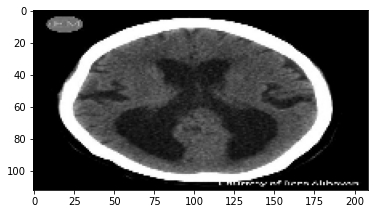

In [43]:
result =['no,tumour is not present','yes,tumour is present']
test_image = cv.imread('/Users/apple/Desktop/Test_3.jpg')
plt.imshow(test_image)
test_image = cv.resize(test_image, dsize=(240, 240), interpolation=cv.INTER_CUBIC)
        # normalize values
test_image = test_image / 255
prediction = model.predict(np.array([test_image])/255)
index = np.argmax(prediction)
print(result[index])

In [ ]:
for img in X_test:
    result =['no,tumour is not present','yes,tumour is present']
    test_image = img
    test_image = cv.resize(test_image, dsize=(240, 240), interpolation=cv.INTER_CUBIC) # normalize values
    test_image = test_image / 255
    prediction = model.predict(np.array([test_image])/255)
    index = np.argmax(prediction)
    if result[index] == 'yes,tumour is present':
        plt.imshow(test_image)
        print(result[index])

yes,tumour is present
yes,tumour is present
yes,tumour is present
yes,tumour is present
yes,tumour is present
yes,tumour is present
yes,tumour is present
yes,tumour is present
